<a href="https://colab.research.google.com/github/not-rudy/Applied-Experimental-Statistics/blob/main/NASA_Airfoil_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NASA Airfoil Self-Noise**


**Rudy Medrano; Justin Morales; Omar Elaqad**

This project analysis aims to investigate how flow conditions along with geometric
attributes of a NACA 0012 (n0012-il) airfoil, influence sound pressure levels (SSPL). The
implementation of statistics is relevant to the topic of interest, specifically in aerospace
engineering design, as it helps pinpoint parameters that need modification. Noise
generated by airfoils arise from complex aerodynamic interactions that put at risk
efficiency, meeting aircraft noise regulations, and accumulating turbulent flow. Through
statistical methods, we will be able analyze trends from the NASA Airfoil Self-Noise
dataset to draw meaningful engineering conclusions. Choosing our data from NASA
experiments ensures that we will have consistency, but bias could arise from using only
a one airfoil type and limited test conditions. Regarding our group contribution, the tasks
will be split among our three members in ways such as data handling, analysis, and
reporting.

**Experiment 1: SSPL as a function of Chord Length and Free Stream Velocity**

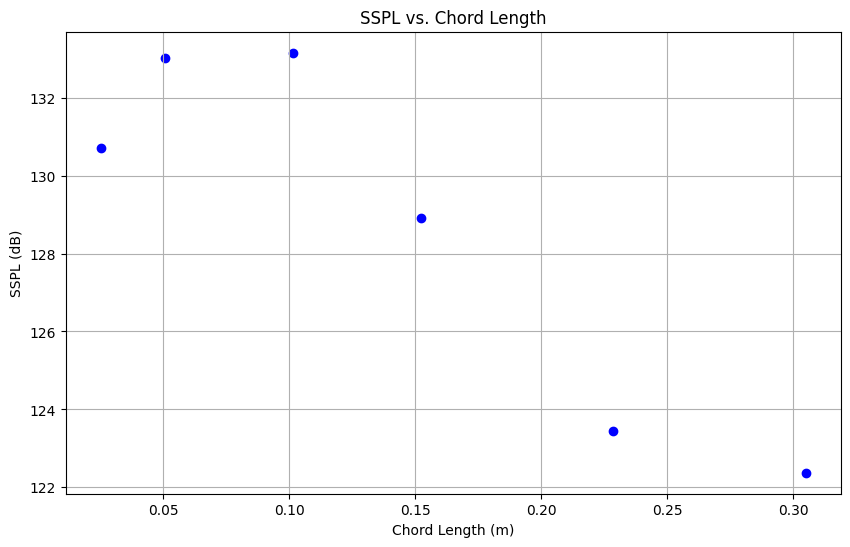

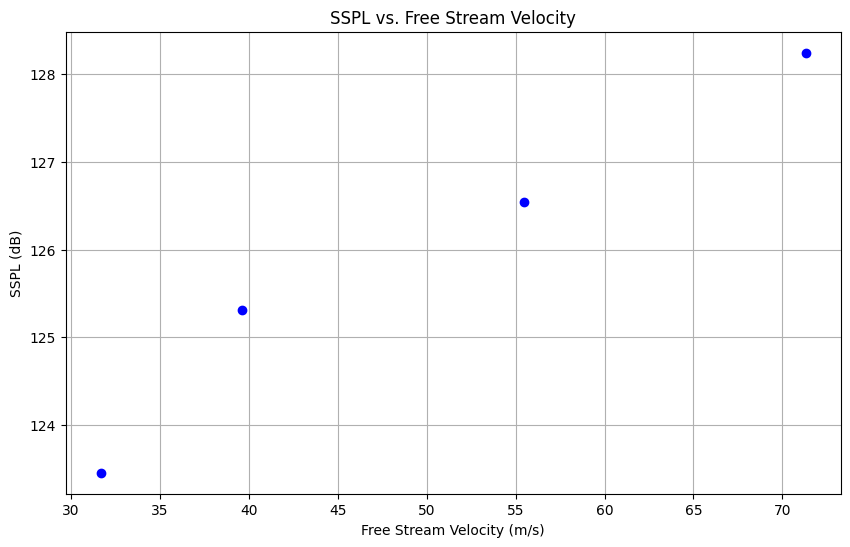

In [28]:
## MAE 301: Applied Experimental Statistics - Final Project: NASA Airfoil Self-Noise
# Members: Rudy Medrano, Justin Moralas, Omar Elaqad

## Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data
data = pd.read_csv("/AirfoilSelfNoise.csv")

## Establish Variables
Frequency = data['f'] # Frequency, in Hertz [Hz]
alpha = data['alpha'] # Angle of attack, in degrees [deg]
chord = data['c'] # Chord Length, in meters [m]
FreeStream = data['U_infinity'] # Free Stream Velocity, in meters per second [m/s
delta = data['delta'] # Suction Side Displacement Thickness, in meters [m]
SSPL = data['SSPL'] # Scaled Sound Pressure Level, in decibels [dB]

## Experiment 1: SSPL as a function of Chord Length and Free Stream Velocity

# Establish Target Values
target_freq = 2000 # Target frequency, in Hertz [Hz]
target_alpha = 0 # Target angle of attack, in degrees [deg]
target_FreeStream = 31.7 # Target Free Stream Velocity, in meters per second [m/s]

# Create the Constraints for the Chord Length Experiment
chord_constraint = (Frequency == target_freq) & (alpha == target_alpha) & (FreeStream == target_FreeStream)

# Filter the Data
chord_filtered = data.loc[chord_constraint, 'c']
SSPL_filtered = data.loc[chord_constraint, 'SSPL']

# Plotting SSPL as a function of Chord Length
plt.figure(figsize=(10, 6))
plt.scatter(chord_filtered, SSPL_filtered, color='blue', label='')
plt.title('SSPL vs. Chord Length')
plt.xlabel('Chord Length (m)')
plt.ylabel('SSPL (dB)')
plt.grid(True)
plt.show()

# Create the Constraints for the Free Stream Experiment
FreeStream_constraint = (Frequency == target_freq) & (alpha == target_alpha) & (chord == 0.2286)

# Filter the Data
FreeStream_filtered = data.loc[FreeStream_constraint, 'U_infinity']
SSPL_filtered = data.loc[FreeStream_constraint, 'SSPL']

# Plotting SSPL as a function of Free Stream Velocity
plt.figure(figsize=(10, 6))
plt.scatter(FreeStream_filtered, SSPL_filtered, color='blue', label='')
plt.title('SSPL vs. Free Stream Velocity')
plt.xlabel('Free Stream Velocity (m/s)')
plt.ylabel('SSPL (dB)')
plt.grid(True)




As demonstrated above, SSPL appears to decrease with increasing chord length; and increase with increasing Free Stream Velocity.

**Experiment 2: SSPL in relation to changing Chord Length and Free Stream Velocity**

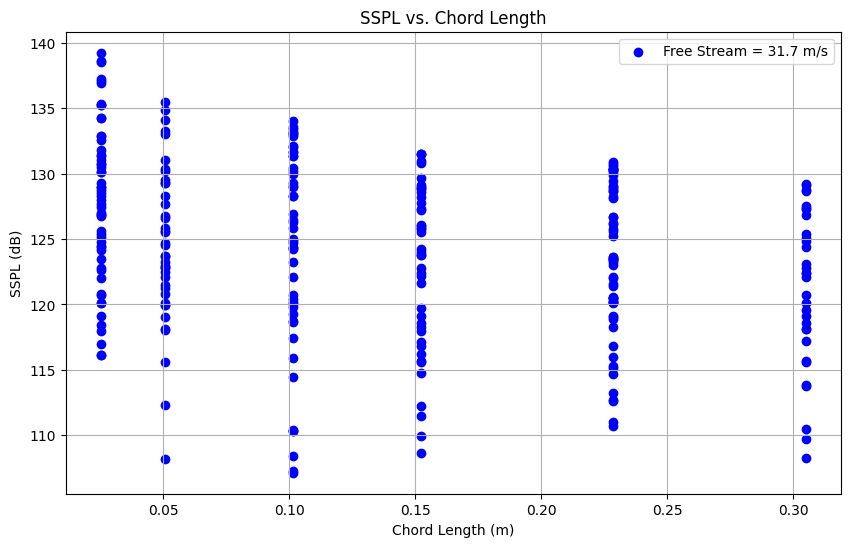

<ipython-input-38-1f9e6aafd5f6>:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_chords.values, labels=[f"{c:.3f}" for c in grouped_chords.index])


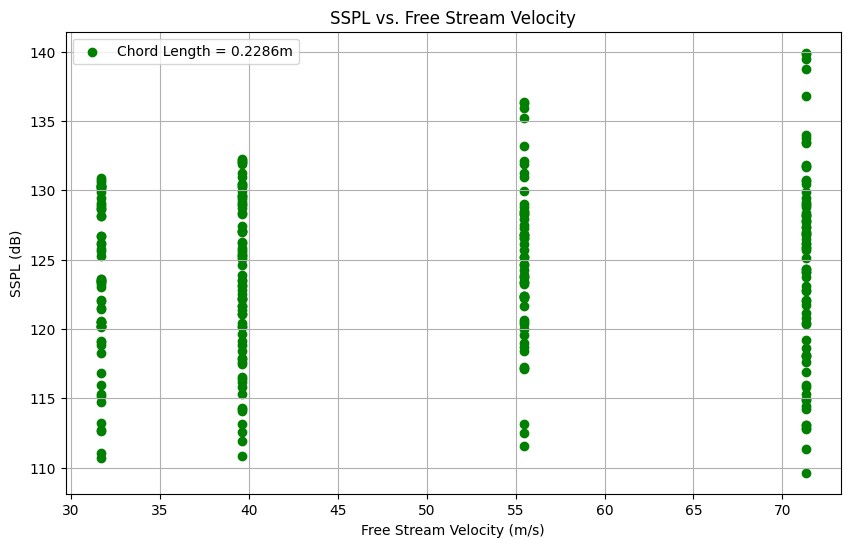

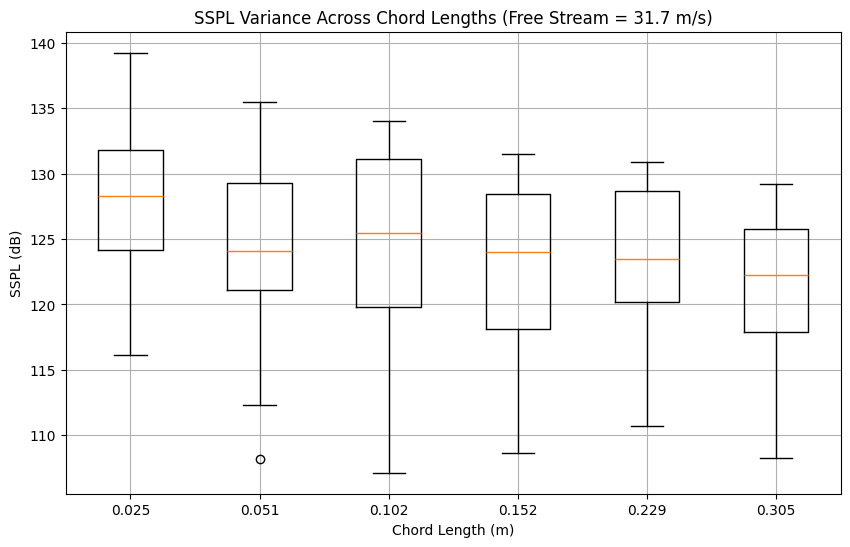

<ipython-input-38-1f9e6aafd5f6>:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_velocities.values, labels=[f"{v:.1f}" for v in grouped_velocities.index])


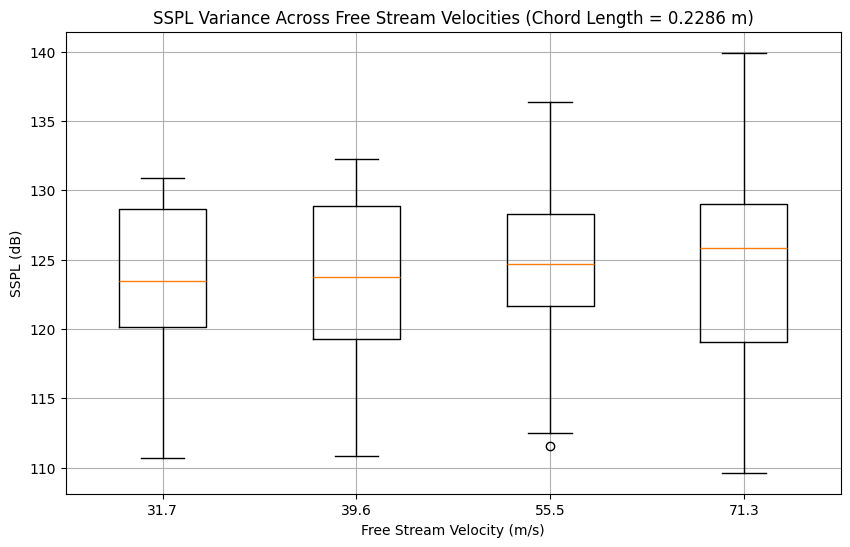

In [38]:
## MAE 301: Applied Experimental Statistics - Final Project: NASA Airfoil Self-Noise
# Members: Rudy Medrano, Justin Moralas, Omar Elaqad

## Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data
data = pd.read_csv("/AirfoilSelfNoise.csv")

## Establish Variables
Frequency = data['f'] # Frequency, in Hertz [Hz]
alpha = data['alpha'] # Angle of attack, in degrees [deg]
chord = data['c'] # Chord Length, in meters [m]
FreeStream = data['U_infinity'] # Free Stream Velocity, in meters per second [m/s
delta = data['delta'] # Suction Side Displacement Thickness, in meters [m]
SSPL = data['SSPL'] # Scaled Sound Pressure Level, in decibels [dB]

## Experiment 1: SSPL as a function of Chord Length and Free Stream Velocity

# Establish Target Values

target_FreeStream = 31.7 # Target Free Stream Velocity, in meters per second [m/s]

# Create the Constraints for the Chord Length Experiment
chord_constraint =  (FreeStream == target_FreeStream)

# Filter the Data
chord_filtered = data.loc[chord_constraint, 'c']
SSPL_filtered = data.loc[chord_constraint, 'SSPL']

# Plotting SSPL as a function of Chord Length
plt.figure(figsize=(10, 6))
plt.scatter(chord_filtered, SSPL_filtered, color='blue', label='Free Stream = 31.7 m/s')
plt.title('SSPL vs. Chord Length')
plt.xlabel('Chord Length (m)')
plt.ylabel('SSPL (dB)')
plt.grid(True)
plt.legend()
plt.show()

# Create the Constraints for the Free Stream Experiment
FreeStream_constraint = (chord == 0.2286)

# Filter the Data
FreeStream_filtered = data.loc[FreeStream_constraint, 'U_infinity']
SSPL_filtered = data.loc[FreeStream_constraint, 'SSPL']

# Plotting SSPL as a function of Free Stream Velocity
plt.figure(figsize=(10, 6))
plt.scatter(FreeStream_filtered, SSPL_filtered, color='green', label='Chord Length = 0.2286m')
plt.title('SSPL vs. Free Stream Velocity')
plt.xlabel('Free Stream Velocity (m/s)')
plt.ylabel('SSPL (dB)')
plt.legend()
plt.grid(True)

# Boxplot 1: SSPL grouped by Chord Length at Free Stream = 31.7 m/s
plt.figure(figsize=(10, 6))
grouped_chords = data.loc[chord_constraint].groupby('c')['SSPL'].apply(list)
plt.boxplot(grouped_chords.values, labels=[f"{c:.3f}" for c in grouped_chords.index])
plt.title('SSPL Variance Across Chord Lengths (Free Stream = 31.7 m/s)')
plt.xlabel('Chord Length (m)')
plt.ylabel('SSPL (dB)')
plt.grid(True)
plt.show()

# Boxplot 2: SSPL grouped by Free Stream Velocity at Chord Length = 0.2286 m
plt.figure(figsize=(10, 6))
grouped_velocities = data.loc[FreeStream_constraint].groupby('U_infinity')['SSPL'].apply(list)
plt.boxplot(grouped_velocities.values, labels=[f"{v:.1f}" for v in grouped_velocities.index])
plt.title('SSPL Variance Across Free Stream Velocities (Chord Length = 0.2286 m)')
plt.xlabel('Free Stream Velocity (m/s)')
plt.ylabel('SSPL (dB)')
plt.grid(True)
plt.show()